In [1]:
import os
import numpy as np

import analysis_utils as utils

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cohort = 'cohort_2_v2'
to_analyze = 'full_clean'
data_dir = '/Users/rebekahzhang/Documents/shuler_lab/behavior_data'
data_folder = os.path.join(data_dir, cohort, to_analyze)
print(data_folder)

/Users/rebekahzhang/Documents/shuler_lab/behavior_data/cohort_2_v2/full_clean


## load session log

In [3]:
training_session_log = utils.load_session_log(data_folder, 'training_sessions.csv')

make mouse list

In [4]:
mouse_list = utils.generate_mouse_list(training_session_log)

['RZ012', 'RZ013', 'RZ015', 'RZ016', 'RZ017']


In [5]:
dir_name = training_session_log.dir[1]
file_name = training_session_log.filename[1]
processed_session = utils.load_processed_session(data_folder, dir_name, file_name)

In [10]:
processed_session.loc[processed_session.key == 'reward']

,session_time,block_num,session_trial_num,block_trial_num,state,time_bg,reward_size,value,key,trial_time
23,1.685640e+09,0.0,0.0,0.0,in_consumption,NaN,NaN,1,reward,3.542972
73,1.685640e+09,0.0,1.0,1.0,in_consumption,NaN,NaN,1,reward,3.477010
121,1.685640e+09,0.0,2.0,2.0,in_consumption,NaN,NaN,1,reward,3.628369
173,1.685640e+09,0.0,3.0,3.0,in_consumption,NaN,NaN,1,reward,3.736630
249,1.685640e+09,0.0,4.0,4.0,in_consumption,NaN,NaN,1,reward,3.526336
...,...,...,...,...,...,...,...,...,...,...
21773,1.685642e+09,1.0,316.0,153.0,in_consumption,NaN,NaN,1,reward,5.049324
21901,1.685642e+09,1.0,317.0,154.0,in_consumption,NaN,NaN,1,reward,1.465922
21945,1.685642e+09,1.0,318.0,155.0,in_consumption,NaN,NaN,1,reward,2.993647
22025,1.685642e+09,1.0,319.0,156.0,in_consumption,NaN,NaN,1,reward,4.658107


In [7]:
licks = processed_session.loc[(processed_session['key'] == 'lick') & (processed_session['value'] == 1)]
pumps = processed_session.loc[(processed_session['key'] == 'pump') & (processed_session['value'] == 1)]

In [8]:
licks_by_trial = licks.groupby('session_trial_num')
pumps_by_trial = pumps.groupby('session_trial_num')

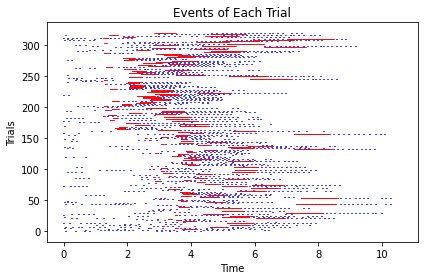

In [11]:
plt.figure()
plt.eventplot([trial['trial_time'].tolist() for _, trial in licks_by_trial], colors='b')
plt.eventplot([trial['trial_time'].tolist() for _, trial in pumps_by_trial], colors='r')
plt.xlabel('Time')
plt.ylabel('Trials')
plt.title('Events of Each Trial')
plt.tight_layout()
plt.show()

In [17]:
processed_session

,session_time,block_num,session_trial_num,block_trial_num,state,time_bg,reward_size,value,key
0,1.685640e+09,-1.0,-1.0,-1.0,None,None,NaN,1,session
1,1.685640e+09,-1.0,-1.0,-1.0,None,None,NaN,1,block
2,1.685640e+09,0.0,0.0,0.0,None,3.5,NaN,1,trial
3,1.685640e+09,0.0,0.0,0.0,in_background,3.5,NaN,1,background
4,1.685640e+09,0.0,0.0,0.0,in_background,NaN,NaN,1,visual
...,...,...,...,...,...,...,...,...,...
22236,1.685643e+09,NaN,NaN,NaN,NaN,NaN,NaN,1,visual
22237,1.685643e+09,NaN,NaN,NaN,NaN,NaN,NaN,0,visual
22238,1.685643e+09,1.0,322.0,159.0,in_wait,0.9,NaN,1,wait
22239,1.685643e+09,1.0,322.0,159.0,trial_transition,0.9,NaN,0,trial


In [35]:
total_trial_num = 321
processed_session_test = processed_session.loc[processed_session.session_trial_num <= total_trial_num]

In [36]:
processed_session_test

,session_time,block_num,session_trial_num,block_trial_num,state,time_bg,reward_size,value,key
0,1.685640e+09,-1.0,-1.0,-1.0,None,None,NaN,1,session
1,1.685640e+09,-1.0,-1.0,-1.0,None,None,NaN,1,block
2,1.685640e+09,0.0,0.0,0.0,None,3.5,NaN,1,trial
3,1.685640e+09,0.0,0.0,0.0,in_background,3.5,NaN,1,background
4,1.685640e+09,0.0,0.0,0.0,in_background,NaN,NaN,1,visual
...,...,...,...,...,...,...,...,...,...
22229,1.685642e+09,1.0,321.0,158.0,in_background,1.0,NaN,1,background
22230,1.685642e+09,1.0,321.0,158.0,in_background,NaN,NaN,1,visual
22231,1.685642e+09,1.0,321.0,158.0,in_background,NaN,NaN,0,visual
22232,1.685642e+09,1.0,321.0,158.0,in_background,1.0,NaN,1,wait


In [38]:
grouped = processed_session_test.groupby('session_trial_num')

In [ ]:
df = pd.DataFrame(data)
df['time_stamp'] = pd.to_datetime(df['time_stamp'])  # Convert time_stamp to datetime type

grouped = df.groupby('trial_number')

plt.figure(figsize=(10, 6))
plt.eventplot([group['time_stamp'].tolist() for _, group in grouped], linelengths=0.5, colors='b')
plt.xlabel('Time')
plt.ylabel('Trials')
plt.title('Events of Each Trial')
plt.tight_layout()
plt.show()

In [40]:
grouped.get_group(1)

,session_time,block_num,session_trial_num,block_trial_num,state,time_bg,reward_size,value,key
34,1.685640e+09,0.0,1.0,1.0,trial_transition,3.4,NaN,1,trial
35,1.685640e+09,0.0,1.0,1.0,in_background,3.4,NaN,1,background
36,1.685640e+09,0.0,1.0,1.0,in_background,NaN,NaN,1,visual
37,1.685640e+09,0.0,1.0,1.0,in_background,NaN,NaN,1,lick
38,1.685640e+09,0.0,1.0,1.0,in_background,NaN,NaN,0,lick
...,...,...,...,...,...,...,...,...,...
90,1.685640e+09,0.0,1.0,1.0,in_consumption,NaN,NaN,0,lick
91,1.685640e+09,0.0,1.0,1.0,in_consumption,NaN,NaN,1,lick
92,1.685640e+09,0.0,1.0,1.0,in_consumption,NaN,NaN,0,lick
93,1.685640e+09,0.0,1.0,1.0,in_consumption,NaN,NaN,1,lick
